In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Merge the 12 months data into a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
files = [file for file in os.listdir("./Sales_data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)

Read from the updated data frame

In [16]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data

In [18]:
nan_df = all_data[all_data.isna().any(axis = 1)]
display(nan_df.head())
all_data.dropna(how = "all", inplace = True)
display(all_data.head())


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find 'o' in the month column and delete it

In [24]:
all_data = all_data[all_data["Order Date"].str[0:2] != "O"]

Convert the columns to correct type

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [29]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

Augument data with additional columns

Add a month column

In [25]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Add sales column

In [30]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Add city column

In [48]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(' ')[1]


all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + '('+ get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


DATA EXPLORATION

1) The best month for sales and the amount earned that month

In [33]:
results = all_data.groupby(['Month']).sum()

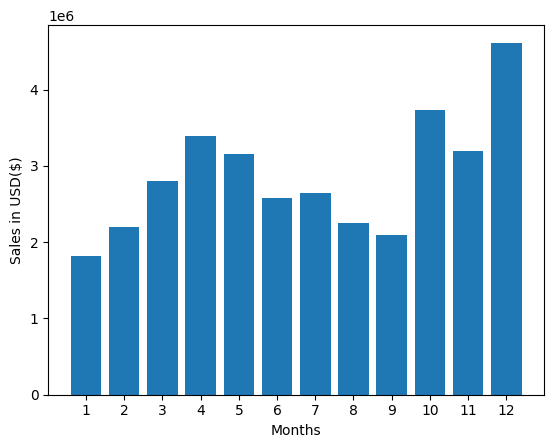

In [38]:
months = range(1,13)
plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD($)")
plt.show()

From the graph we can understand that December had the highest number of sales ranging upto approximately 5000000 USD compared to the other months

2) The city that had the highest number of sales

In [51]:
results1 = all_data.groupby("City").sum()

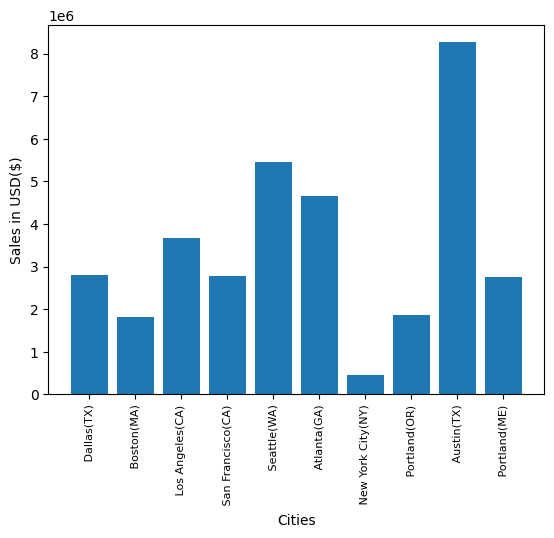

In [53]:
cities = all_data["City"].unique()
plt.bar(cities, all_data.groupby(['City']).sum()['Sales'])
plt.xticks(cities, rotation = "vertical", size = 8)
plt.xlabel("Cities")
plt.ylabel("Sales in USD($)")
plt.show()

From this we can understand that Austin(TX) had the highest number of sales compared to the other states with a sales amount of approx 8200000 USD

3) The time we should display advertisements so as to maximize the likelihood of customers buying the products

In [56]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

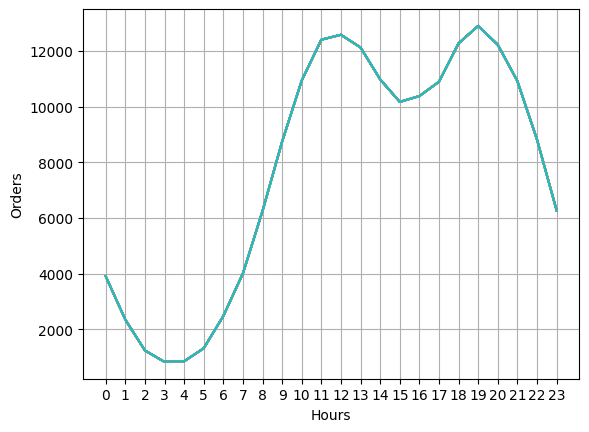

In [61]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Orders")
plt.grid()
plt.show()

According to the graph, the peak time to display advertisements so as to maximise the likelihood of customers buying the products will be around 11:00-12:00 and 18:00-19:00.

4) The products that are often sold together

In [67]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

C:\Users\MBUSER\AppData\Local\Temp\ipykernel_2176\1752327034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [71]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common():
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

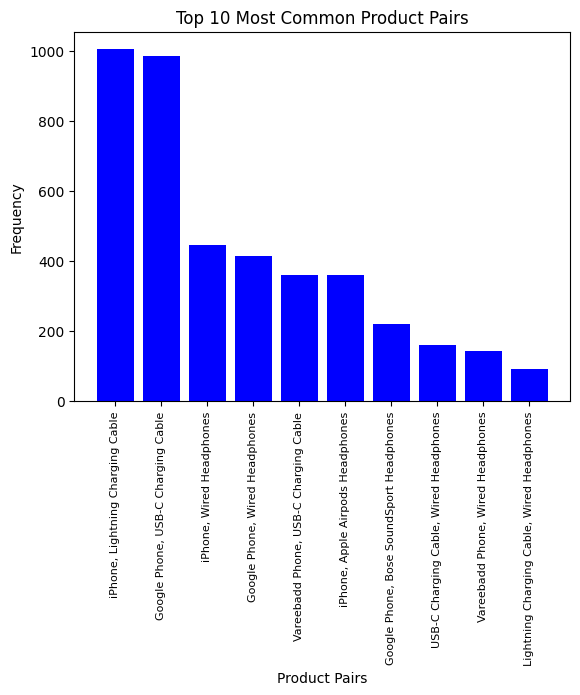

In [85]:
most_common_pairs = count.most_common(10)  # Top 10 most common pairs
pairs, pair_counts = zip(*most_common_pairs)

# Prepare the product pairs as strings for plotting
pair_strings = [', '.join(pair) for pair in pairs]

plt.bar(pair_strings, pair_counts, color='blue')
plt.xlabel('Product Pairs')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical', size=8)
plt.title('Top 10 Most Common Product Pairs')
plt.show()

From this data we analyse that the most commonly purchased pairs of products by the customers were iPhone and the Lightning Charging Cable.

5) The product that was sold the most and why was it sold most compared to other products

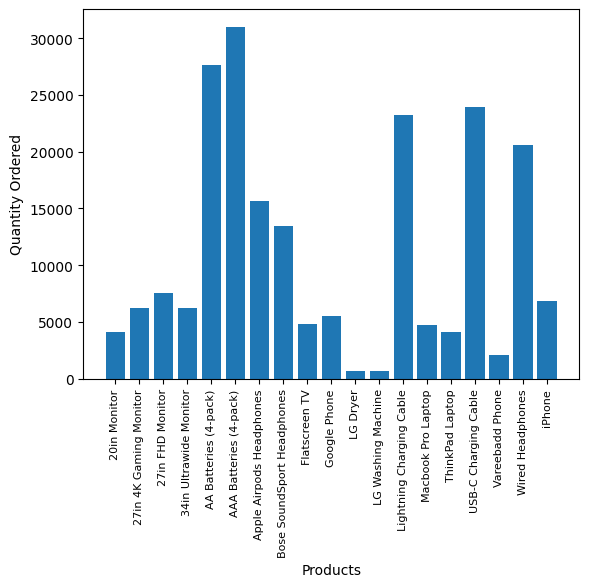

In [74]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum(numeric_only = True)["Quantity Ordered"]

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = "vertical", size = 8)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()


C:\Users\MBUSER\AppData\Local\Temp\ipykernel_2176\2709458278.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = "vertical", size = 8)


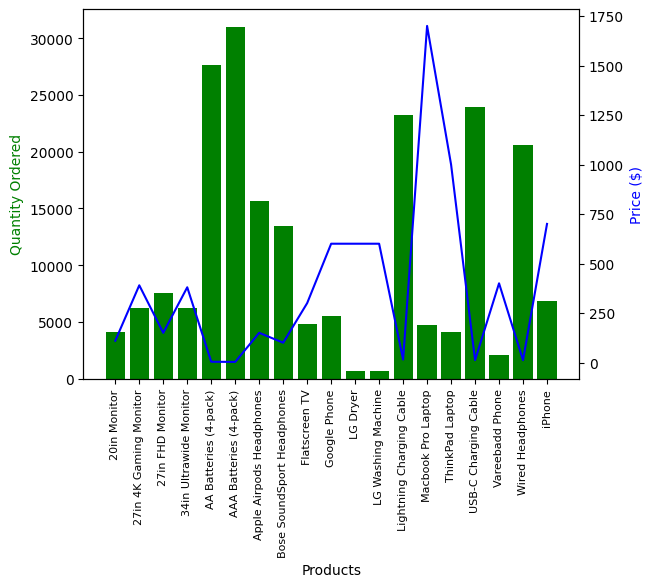

In [83]:
prices = all_data.groupby("Product").mean(numeric_only = True)["Price Each"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color = "g")
ax1.set_xticklabels(products, rotation = "vertical", size = 8)
ax2.set_ylabel("Price ($)", color = 'b')
plt.show()

From this analysis we can conclude that the AAA Batteries(4-pack) were mostly bought by the customers as the mean price of the batteries is comparitively lower compared to the other products.